<a href="https://colab.research.google.com/github/UjanGanguli/Python-Basics/blob/main/EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset: Success/Failure of a startup

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns

In [ ]:
df=pd.read_csv('bcd.csv')

In [ ]:
#Finding missing values
df.isnull().sum()

name                     1
category_list         3148
funding_total_usd    12785
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        24
last_funding_at          0
dtype: int64

In [ ]:
df.isnull().sum().to_frame().T

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,1,3148,12785,0,6958,8547,8030,8028,0,15221,24,0


In [ ]:
funding_mean=round(df['funding_total_usd'].mean(), 1)
funding_median=df['funding_total_usd'].median()
funding_mode=df['funding_total_usd'].mode()
print(bmi_mean)
print(bmi_med)
print(bmi_mod)

18478604.0
2000000.0
0    1000000.0
Name: funding_total_usd, dtype: float64


In [ ]:
df_imp = df.fillna(funding_mean, axis=1)
df_imp

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,18478604.0,05-01-2015,05-01-2015
1,:Qounter,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,04-09-2014,01-03-2014,14-10-2014
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878.0,operating,18478604.0,18478604.0,18478604.0,18478604.0,1,18478604.0,30-01-2014,30-01-2014
3,0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,01-01-2007,19-03-2008,19-03-2008
4,004 Technologies,Software,18478604.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,01-01-2010,24-07-2014,24-07-2014
...,...,...,...,...,...,...,...,...,...,...,...,...
66363,ZZNode Science and Technology,Enterprise Software,1587301.0,operating,CHN,22,Beijing,Beijing,1,18478604.0,01-04-2012,01-04-2012
66364,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,15,Split,Split,4,13-05-2012,01-11-2011,01-03-2014
66365,ÁERON,18478604.0,18478604.0,operating,18478604.0,18478604.0,18478604.0,18478604.0,1,01-01-2011,01-08-2014,01-08-2014
66366,Ôasys,Consumer Electronics|Internet of Things|Teleco...,18192.0,operating,USA,CA,SF Bay Area,San Francisco,1,01-01-2014,01-01-2015,01-01-2015


In [ ]:
df_imp1=df.fillna(funding_median, axis=1)
df_imp1

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,2000000.0,05-01-2015,05-01-2015
1,:Qounter,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,04-09-2014,01-03-2014,14-10-2014
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878.0,operating,2000000.0,2000000.0,2000000.0,2000000.0,1,2000000.0,30-01-2014,30-01-2014
3,0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,01-01-2007,19-03-2008,19-03-2008
4,004 Technologies,Software,2000000.0,operating,USA,IL,"Springfield, Illinois",Champaign,1,01-01-2010,24-07-2014,24-07-2014
...,...,...,...,...,...,...,...,...,...,...,...,...
66363,ZZNode Science and Technology,Enterprise Software,1587301.0,operating,CHN,22,Beijing,Beijing,1,2000000.0,01-04-2012,01-04-2012
66364,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,15,Split,Split,4,13-05-2012,01-11-2011,01-03-2014
66365,ÁERON,2000000.0,2000000.0,operating,2000000.0,2000000.0,2000000.0,2000000.0,1,01-01-2011,01-08-2014,01-08-2014
66366,Ôasys,Consumer Electronics|Internet of Things|Teleco...,18192.0,operating,USA,CA,SF Bay Area,San Francisco,1,01-01-2014,01-01-2015,01-01-2015


In [ ]:
#Filling missing values with bmi_mean and storing new dataframe in df_imp
funding_mode=1000000
df_imp2 = df.fillna(funding_mode, axis=1)
df_imp2

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,#fame,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,1000000,05-01-2015,05-01-2015
1,:Qounter,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,04-09-2014,01-03-2014,14-10-2014
2,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,3406878.0,operating,1000000,1000000,1000000,1000000,1,1000000,30-01-2014,30-01-2014
3,0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,01-01-2007,19-03-2008,19-03-2008
4,004 Technologies,Software,1000000,operating,USA,IL,"Springfield, Illinois",Champaign,1,01-01-2010,24-07-2014,24-07-2014
...,...,...,...,...,...,...,...,...,...,...,...,...
66363,ZZNode Science and Technology,Enterprise Software,1587301.0,operating,CHN,22,Beijing,Beijing,1,1000000,01-04-2012,01-04-2012
66364,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,15,Split,Split,4,13-05-2012,01-11-2011,01-03-2014
66365,ÁERON,1000000,1000000,operating,1000000,1000000,1000000,1000000,1,01-01-2011,01-08-2014,01-08-2014
66366,Ôasys,Consumer Electronics|Internet of Things|Teleco...,18192.0,operating,USA,CA,SF Bay Area,San Francisco,1,01-01-2014,01-01-2015,01-01-2015


In [ ]:
df_imp.isna().sum()

name                 0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
dtype: int64

In [ ]:
numerical_vars = df.select_dtypes(np.number).drop(columns=["funding_rounds"])
categorical_vars = df.select_dtypes("object")

In [ ]:
numerical_vars.isnull().sum()

funding_total_usd    0
dtype: int64

In [ ]:
categorical_vars.isnull().sum()

name                0
category_list       0
status              0
country_code        0
state_code          0
region              0
city                0
founded_at          0
first_funding_at    0
last_funding_at     0
dtype: int64

In [ ]:
#KNN based imputation

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(numerical_vars)
data_imputed = pd.DataFrame(imputed, columns=numerical_vars.columns)
data_imputed

,funding_total_usd
0,700000.0
1,2000000.0
2,762851.0
3,33600000.0
4,1150050.0
...,...
38007,15419877.0
38008,2686600.0
38009,1120000.0
38010,114304.0


In [ ]:
#separating null values

df_null=df[df["funding_total_usd"].isnull()]
df_null

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at


In [ ]:
df.dropna(inplace=True)
df

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
1,:Qounter,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,04-09-2014,01-03-2014,14-10-2014
3,0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,01-01-2007,19-03-2008,19-03-2008
6,Ondine Biomedical Inc.,Biotechnology,762851.0,operating,CAN,BC,Vancouver,Vancouver,2,01-01-1997,11-09-2009,21-12-2009
7,H2O.ai,Analytics,33600000.0,operating,USA,CA,SF Bay Area,Mountain View,4,01-01-2011,03-01-2013,09-11-2015
8,One Inc.,Mobile,1150050.0,operating,USA,CA,SF Bay Area,San Francisco,3,01-08-2011,20-07-2011,05-02-2014
...,...,...,...,...,...,...,...,...,...,...,...,...
66358,Zyraz Technology,Biotechnology,15419877.0,closed,MYS,14,MYS - Other,Damansara New Village,4,01-01-1994,01-01-2008,15-02-2013
66361,Zytoprotec,Biotechnology,2686600.0,operating,AUT,3,Vienna,Gerasdorf Bei Wien,1,01-01-2007,29-01-2013,29-01-2013
66362,Zzish,Analytics|Android|Developer APIs|Education|Gam...,1120000.0,operating,GBR,H9,London,London,3,28-01-2014,24-03-2014,25-02-2015
66364,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,15,Split,Split,4,13-05-2012,01-11-2011,01-03-2014


In [ ]:
data_new = numerical_vars[np.isfinite(numerical_vars).all(1)]

#view updated DataFrame
print(data_new)

       funding_total_usd
1               700000.0
3              2000000.0
6               762851.0
7             33600000.0
8              1150050.0
...                  ...
66358         15419877.0
66361          2686600.0
66362          1120000.0
66364           114304.0
66366            18192.0

[38012 rows x 1 columns]


In [ ]:
#Create X_train and Y_train from data
y_train = data_new["funding_total_usd"]
X_train = data_new.drop("funding_total_usd",axis=1)
y_train

1          700000.0
3         2000000.0
6          762851.0
7        33600000.0
8         1150050.0
            ...    
66358    15419877.0
66361     2686600.0
66362     1120000.0
66364      114304.0
66366       18192.0
Name: funding_total_usd, Length: 38012, dtype: float64

In [ ]:
sns.set()

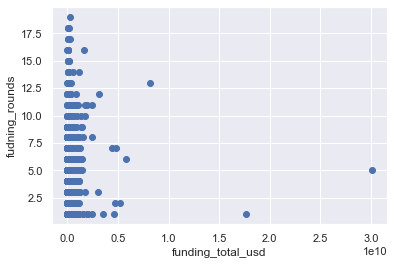

In [ ]:
plt.scatter(df["funding_total_usd"],df["funding_rounds"])
plt.xlabel('funding_total_usd')
plt.ylabel('fudning_rounds')
plt.show()

In [ ]:
numeric_cols = ['funding_total_usd']
numeric_data = df[numeric_cols]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_data)
print(kmeans.cluster_centers_)
print(pd.Series(kmeans.labels_).value_counts())

[[ 3.58735831e+00]
 [-2.99213589e-02]
 [ 1.14751452e+02]
 [ 2.27460155e+01]]
1    37812
0      188
3       10
2        2
dtype: int64


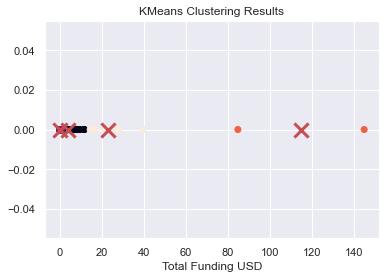

In [ ]:
plt.scatter(scaled_data[:, 0], [0] * len(scaled_data), c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], [0] * len(kmeans.cluster_centers_), marker='x', s=200, linewidths=3, color='r')
plt.title('KMeans Clustering Results')
plt.xlabel('Total Funding USD')
plt.show()

C:\Users\Shashank\AppData\Local\Temp\ipykernel_12804\451200015.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


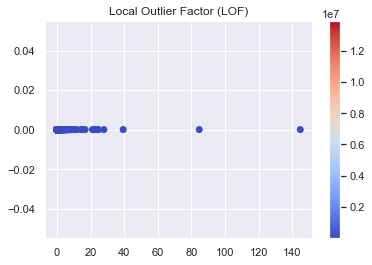

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
outlier_scores = lof.fit_predict(scaled_data)
plt.scatter(scaled_data[:, 0], [0] * len(scaled_data), c=-lof.negative_outlier_factor_, cmap='coolwarm')
plt.colorbar()
plt.title("Local Outlier Factor (LOF)")
plt.show()

In [ ]:
numeric_cols = ['funding_total_usd']
numeric_data =df[numeric_cols]

# Scale the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled_data)

# Print the cluster centers and the count of movies in each cluster
print(kmeans.cluster_centers_)
print(pd.Series(kmeans.labels_).value_counts())

[[ 3.58735831e+00]
 [-2.99213589e-02]
 [ 1.14751452e+02]
 [ 2.27460155e+01]]
1    37812
0      188
3       10
2        2
dtype: int64


 1    19315
 0     8843
 3     4603
 2     2375
 5     1296
 6      701
 7      386
 8      195
-1      182
 4      116
dtype: int64


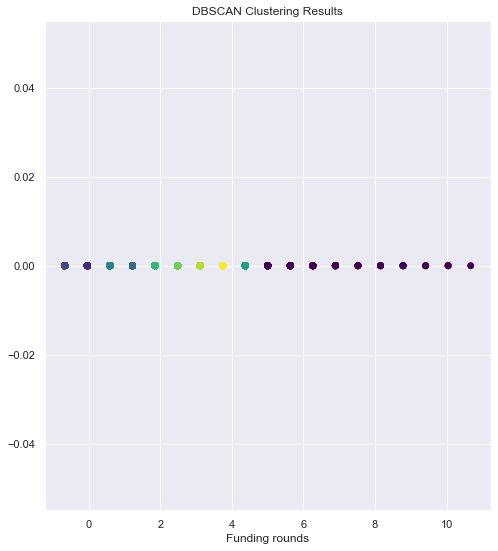

In [ ]:
numeric_cols = ['funding_rounds']
numeric_data =df[numeric_cols]

# Scale the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=100)
dbscan.fit(scaled_data)

# Print the count of movies in each cluster
print(pd.Series(dbscan.labels_).value_counts())

# Plot the clusters
plt.figure(figsize=(8, 9))
plt.scatter(scaled_data[:, 0], np.zeros_like(scaled_data[:, 0]), c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Funding rounds')
plt.show()